In [23]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [24]:
#Punto 1

def DFT(x, y)->tuple:
    x, y = np.array(x), np.array(y)
    N = np.size(y)
    fk = np.linspace(0, (1/2)*(1/(x[1]-x[0])), N)
    transformada = np.zeros(N) + 0j
    for k in range(N):
        transformada[k] = (y*np.exp(-np.pi*(2j)*x*fk[k])).sum()
    return (fk, transformada)

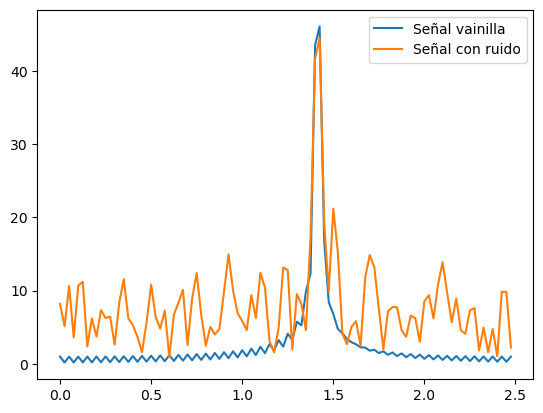

In [25]:
#Punto 2

def Signal (t):
    return np.sin(2*np.pi*np.sqrt(2)*t)

t=np.linspace(0,20,100)
signal=Signal(t)
ruido=np.random.normal(0,1,len(signal))
signal_noise=signal+ruido

frecuencias, transformada= DFT(t,signal)
frecuencias_ruido,transformada_ruido=DFT(t,signal_noise)

plt.plot(frecuencias, np.absolute(transformada), label='Señal vainilla')
plt.plot(frecuencias_ruido,np.absolute(transformada_ruido), label='Señal con ruido')
plt.legend()
plt.show()


In [28]:
#Punto 3

indice_max=np.argmax(transformada)
max=frecuencias[indice_max]  #Este es aproximadamente la frecuencia donde se maximiza

altura_max_media=1/2*np.absolute(transformada[indice_max])



21.769633360338144
